### Importing Packages

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from lpips import LPIPS
import torch

# Question 1

In [2]:
img= cv2.imread(r'C:\Users\User\Pictures\gen_AI\xzg (4).jpg')
noise_intensities = [7, 37, 77]

## Original Image

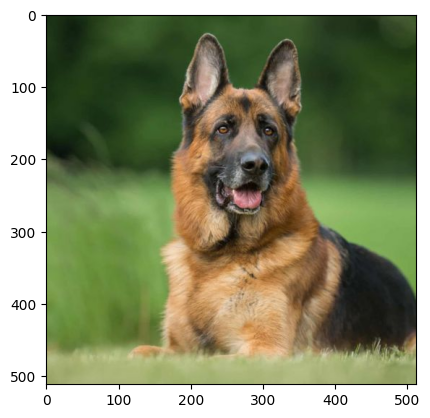

In [3]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [4]:
def noise(img, mean=0, sigma=25):
    row, col, ch = img.shape
    gaussian = np.random.normal(mean, sigma, (row, col, ch))
    noisy = np.clip(img + gaussian, 0, 255)
    return noisy.astype(np.uint8)

## Noisy images

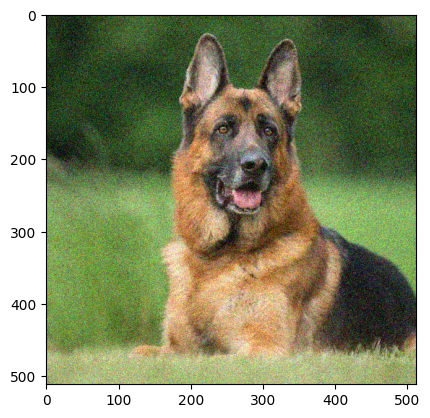

In [5]:
noisy1= noise(img, noise_intensities[0])
plt.imshow(cv2.cvtColor(noisy1, cv2.COLOR_BGR2RGB))

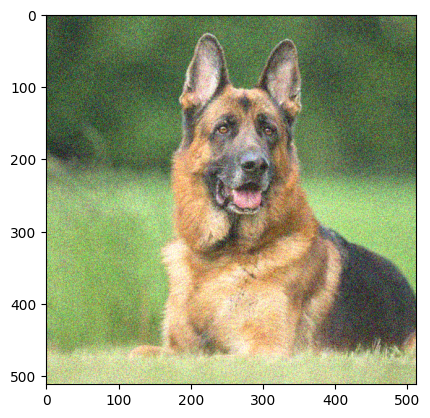

In [6]:
noisy2= noise(img, noise_intensities[1])
plt.imshow(cv2.cvtColor(noisy2, cv2.COLOR_BGR2RGB))

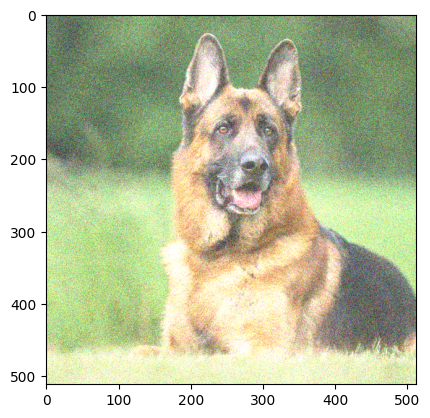

In [7]:
noisy3= noise(img, noise_intensities[2])
plt.imshow(cv2.cvtColor(noisy3, cv2.COLOR_BGR2RGB))

# Question 2

## Original Image

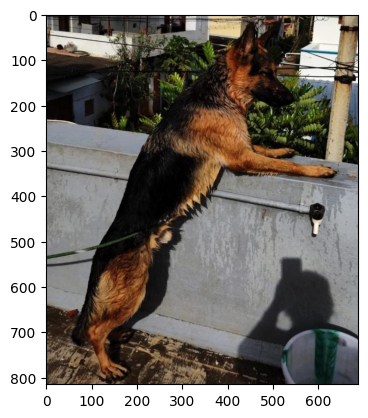

In [8]:
image= cv2.imread(r'C:\Users\User\Pictures\gen_AI\trigger_crop.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## Bluring

### Gaussian blur

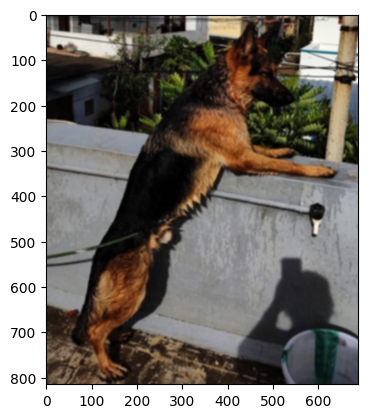

In [9]:
gau = cv2.GaussianBlur(image, (5, 5), 77)
plt.imshow(cv2.cvtColor(gau, cv2.COLOR_BGR2RGB))

### Defocus blur

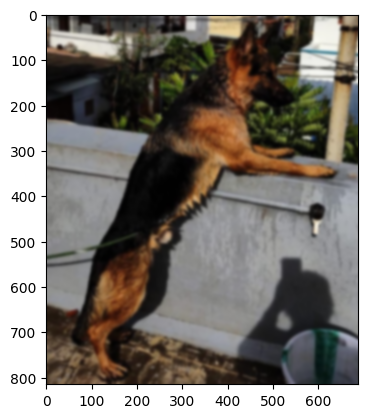

In [10]:
deblur = cv2.GaussianBlur(image, (17, 17), 0)
plt.imshow(cv2.cvtColor(deblur, cv2.COLOR_BGR2RGB))

# Parameter measuring

## against noisy images

#### Noisy image 1

In [11]:
psnr_value = psnr(img, noisy1)
print(f"PSNR: {psnr_value}")

PSNR: 20.02676399514343


In [12]:
ssim_value, _ = ssim(img, noisy1, full=True, win_size=3)
print(f"SSIM: {ssim_value}")

SSIM: 0.6037711073955658


In [13]:
img1_tensor = torch.tensor(img.transpose((2, 0, 1)), dtype=torch.float32) / 255.0
img2_tensor = torch.tensor(noisy1.transpose((2, 0, 1)), dtype=torch.float32) / 255.0

img1_tensor = img1_tensor.unsqueeze(0)
img2_tensor = img2_tensor.unsqueeze(0)

lpips_net = LPIPS(net='alex', lpips=True)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


C:\Users\User\miniconda3\envs\pygpu\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\User\miniconda3\envs\pygpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: C:\Users\User\miniconda3\envs\pygpu\lib\site-packages\lpips\weights\v0.1\alex.pth


In [14]:
lpips_value = lpips_net(img1_tensor, img2_tensor)
print(f"LPIPS: {lpips_value.item()}")

LPIPS: 0.6621609330177307


#### Noisy image 2

In [15]:
psnr_value = psnr(img, noisy2)
print(f"PSNR: {psnr_value}")

PSNR: 15.311672117744568


In [16]:
ssim_value, _ = ssim(img, noisy2, full=True, win_size=3)
print(f"SSIM: {ssim_value}")

SSIM: 0.5636225450997393


In [17]:
img1_tensor = torch.tensor(img.transpose((2, 0, 1)), dtype=torch.float32) / 255.0
img2_tensor = torch.tensor(noisy2.transpose((2, 0, 1)), dtype=torch.float32) / 255.0

img1_tensor = img1_tensor.unsqueeze(0)
img2_tensor = img2_tensor.unsqueeze(0)

lpips_net = LPIPS(net='alex', lpips=True)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: C:\Users\User\miniconda3\envs\pygpu\lib\site-packages\lpips\weights\v0.1\alex.pth


In [18]:
lpips_value = lpips_net(img1_tensor, img2_tensor)
print(f"LPIPS: {lpips_value.item()}")

LPIPS: 0.670354962348938


#### Noisy image 3

In [19]:
psnr_value = psnr(img, noisy3)
print(f"PSNR: {psnr_value}")

PSNR: 10.27207656615698


In [20]:
ssim_value, _ = ssim(img, noisy3, full=True, win_size=3)
print(f"SSIM: {ssim_value}")

SSIM: 0.4975139300626909


In [21]:
img1_tensor = torch.tensor(img.transpose((2, 0, 1)), dtype=torch.float32) / 255.0
img2_tensor = torch.tensor(noisy3.transpose((2, 0, 1)), dtype=torch.float32) / 255.0

img1_tensor = img1_tensor.unsqueeze(0)
img2_tensor = img2_tensor.unsqueeze(0)

lpips_net = LPIPS(net='alex', lpips=True)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: C:\Users\User\miniconda3\envs\pygpu\lib\site-packages\lpips\weights\v0.1\alex.pth


In [22]:
lpips_value = lpips_net(img1_tensor, img2_tensor)
print(f"LPIPS: {lpips_value.item()}")

LPIPS: 0.6798660755157471


## against blurred images

### gaussian blur

In [23]:
psnr_value = psnr(image, gau)
print(f"PSNR: {psnr_value}")

PSNR: 26.9357682992445


In [24]:
ssim_value, _ = ssim(image, gau, full=True, win_size=3)
print(f"SSIM: {ssim_value}")

SSIM: 0.850417851765132


In [25]:
img1_tensor = torch.tensor(image.transpose((2, 0, 1)), dtype=torch.float32) / 255.0
img2_tensor = torch.tensor(gau.transpose((2, 0, 1)), dtype=torch.float32) / 255.0

img1_tensor = img1_tensor.unsqueeze(0)
img2_tensor = img2_tensor.unsqueeze(0)

lpips_net = LPIPS(net='alex', lpips=True)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: C:\Users\User\miniconda3\envs\pygpu\lib\site-packages\lpips\weights\v0.1\alex.pth


In [26]:
lpips_value = lpips_net(img1_tensor, img2_tensor)
print(f"LPIPS: {lpips_value.item()}")

LPIPS: 0.2852316200733185


#### defocus blur

In [27]:
psnr_value = psnr(image, gau)
print(f"PSNR: {psnr_value}")

PSNR: 26.9357682992445


In [28]:
ssim_value, _ = ssim(image, deblur, full=True, win_size=3)
print(f"SSIM: {ssim_value}")

SSIM: 0.8014604545479163


In [29]:
img1_tensor = torch.tensor(image.transpose((2, 0, 1)), dtype=torch.float32) / 255.0
img2_tensor = torch.tensor(deblur.transpose((2, 0, 1)), dtype=torch.float32) / 255.0

img1_tensor = img1_tensor.unsqueeze(0)
img2_tensor = img2_tensor.unsqueeze(0)

lpips_net = LPIPS(net='alex', lpips=True)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: C:\Users\User\miniconda3\envs\pygpu\lib\site-packages\lpips\weights\v0.1\alex.pth


In [30]:
lpips_value = lpips_net(img1_tensor, img2_tensor)
print(f"LPIPS: {lpips_value.item()}")

LPIPS: 0.5040947198867798
